## LAB EVALUATION

In [3]:
from sklearn.datasets import load_wine
import pandas as pd

In [4]:
data=load_wine()
# df=pd.DataFrame()

In [8]:
df=pd.DataFrame(data.data, columns=data.feature_names)

In [9]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [15]:
df.shape

(178, 13)

In [16]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

<Axes: xlabel='alcohol', ylabel='count'>

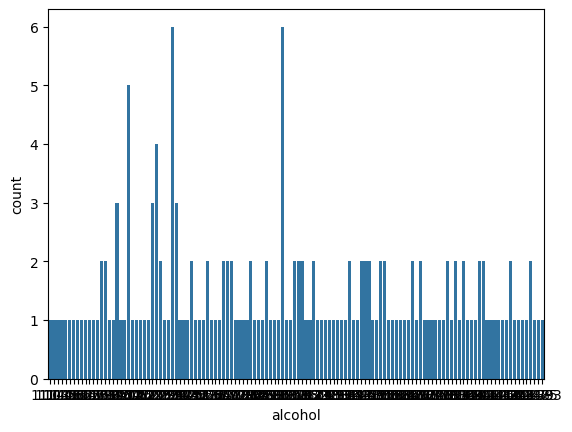

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='alcohol',data=df)

In [19]:
df.dtypes.value_counts()

float64    13
Name: count, dtype: int64

In [23]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [25]:
df.dropna(inplace=True)  #There is not any null values

In [26]:
from sklearn.preprocessing import StandardScaler

In [29]:
df['Target']=data.target

In [30]:
df['Target']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Target, Length: 178, dtype: int64

In [47]:
X_df=df.drop('Target',axis=1)
y=df['Target']

In [48]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_df)

In [49]:
X_scaled[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

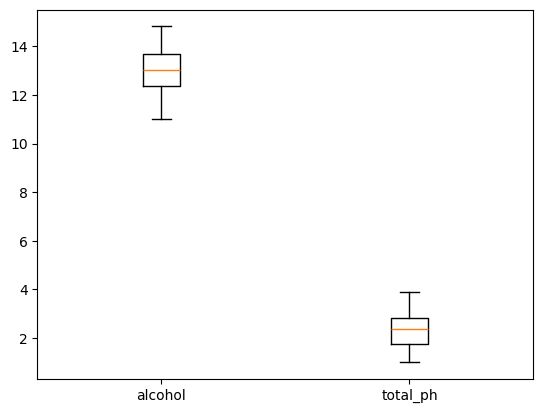

In [50]:
plt.boxplot([df['alcohol'],df['total_phenols']])
plt.xticks([1,2],['alcohol','total_ph'])
plt.show()

In [51]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)

In [52]:
X_pca=pca.fit_transform(X_scaled)

In [56]:
X_pca[1:3]

array([[ 2.20946492, -0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015,  1.0311513 ,  0.98281867,  0.72490231]])

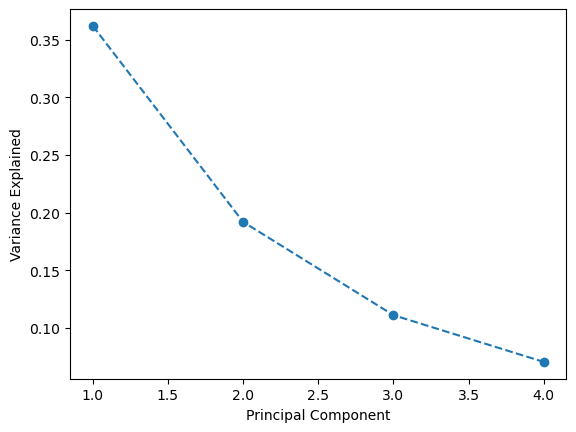

In [64]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_, marker='o',linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()